In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from make_figure_functions import inter_number
from make_figure_functions import get_inters
from make_figure_functions import inter_mix_number
from matplotlib.patches import Wedge
import matplotlib as mpl
import math
import os
def mushrooms(genes):
    from matplotlib.patches import Wedge
    import matplotlib as mpl
    import math
    cell_types = ['B_cells', 'Monocytes', 'NK_cells', 'Plasmablasts', 'T_cells', 'cDCs', 'pDCs']
    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin, vmax = -1, 3
    threshold = 0.1
    frac = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/exp_fra_ave.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    avg = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/ave_exp_ave.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)

    fig, axs = plt.subplots(
        2, 2, 
        figsize=((1 + 0.8 * len(cell_types)) * 0.5, (1 + len(genes[0]) + len(genes[1])) * 0.5),
        gridspec_kw={'height_ratios': [len(genes[0]), len(genes[1])], 
                     'width_ratios':[len(cell_types), 1], 
                     'hspace': 0.01, 'wspace': 0.01,
                    },
        dpi=300
    )
    datap = []
    for iax, (genesi, ax) in enumerate(zip(genes, axs[:, 0])):
        for i, cst in enumerate(cell_types):
            for j, gene in enumerate(genesi):
                avgs = []
                for k, cond in enumerate(conditions):
                    fr = frac.loc[(cst, cond, gene)]
                    av = np.log10(avg.loc[(cst, cond, gene)] + 0.1)
                    avgs.append(av)

                    r = 0.5 * fr**0.3
                    color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                    theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                    datap.append({
                        'r': r,
                        'facecolor': color,
                        'center': (i, j),
                        'theta': (theta0, theta1),
                        'ax': (iax, 0),
                    })
                if avgs[0] - avgs[1] > threshold:
                    datap[-2]['edgecolor'] = 'red'
                    datap[-1]['edgecolor'] = 'none'
                elif avgs[0] - avgs[1] < -threshold:
                    datap[-1]['edgecolor'] = 'red'
                    datap[-2]['edgecolor'] = 'none'
                else:
                    datap[-1]['edgecolor'] = 'none'
                    datap[-2]['edgecolor'] = 'none' 

        ax.set_yticks(np.arange(len(genesi)))
        ax.set_yticklabels(genesi)
        ax.set_ylim(-0.6, len(genesi) - 0.4)        
        ax.set_xticks(np.arange(len(cell_types)))
        ax.set_xticklabels([x.replace('_', ' ') for x in cell_types], rotation=90)
        ax.set_xlim(-0.6, len(cell_types) - 0.4)

    #axs[1, 1] = None
    for datum in datap:
        ax = axs[datum['ax']]
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        ec = datum['edgecolor']

        h = Wedge(
            center, r, theta0, theta1, edgecolor=ec, facecolor=color,
        )
        ax.add_artist(h)
        ax.set_aspect(1)

    axs[0, 0].set_xticklabels([])
    axs[1, 1].axis('off')

    axs[0, 1].set_ylim(-0.6, 5 - 0.4)        
    axs[0, 1].set_xlim(-0.6, 1 - 0.4)
    c = [(0, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        axs[0, 1].add_artist(e)
    axs[0, 1].set_aspect(1)
    axs[0, 1].set_yticks([])
    axs[0, 1].set_yticks(range(5))
    axs[0, 1].set_yticklabels(['5', '10', '20', '40', '80'])
    axs[0, 1].yaxis.tick_right()
    axs[0, 1].yaxis.set_label_position('right')
    axs[0, 1].set_ylabel('Gene exp frac')
    axs[0, 1].set_xticks([])
    axs[0, 1].spines['bottom'].set_visible(False)
    axs[0, 1].spines['top'].set_visible(False)
    axs[0, 1].spines['right'].set_visible(False)
    axs[0, 1].spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) # (max(ave_exp.values())+1)
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([0.85, 0.2, 0.02, 0.25]) # [left, bottom, width, height]
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=axs[1, 0], label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    return {'fig': fig, 'ax': ax}

<ipython-input-5-a3647d529d7d>:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 990x1350 with 5 Axes>, 'ax': <AxesSubplot:>}

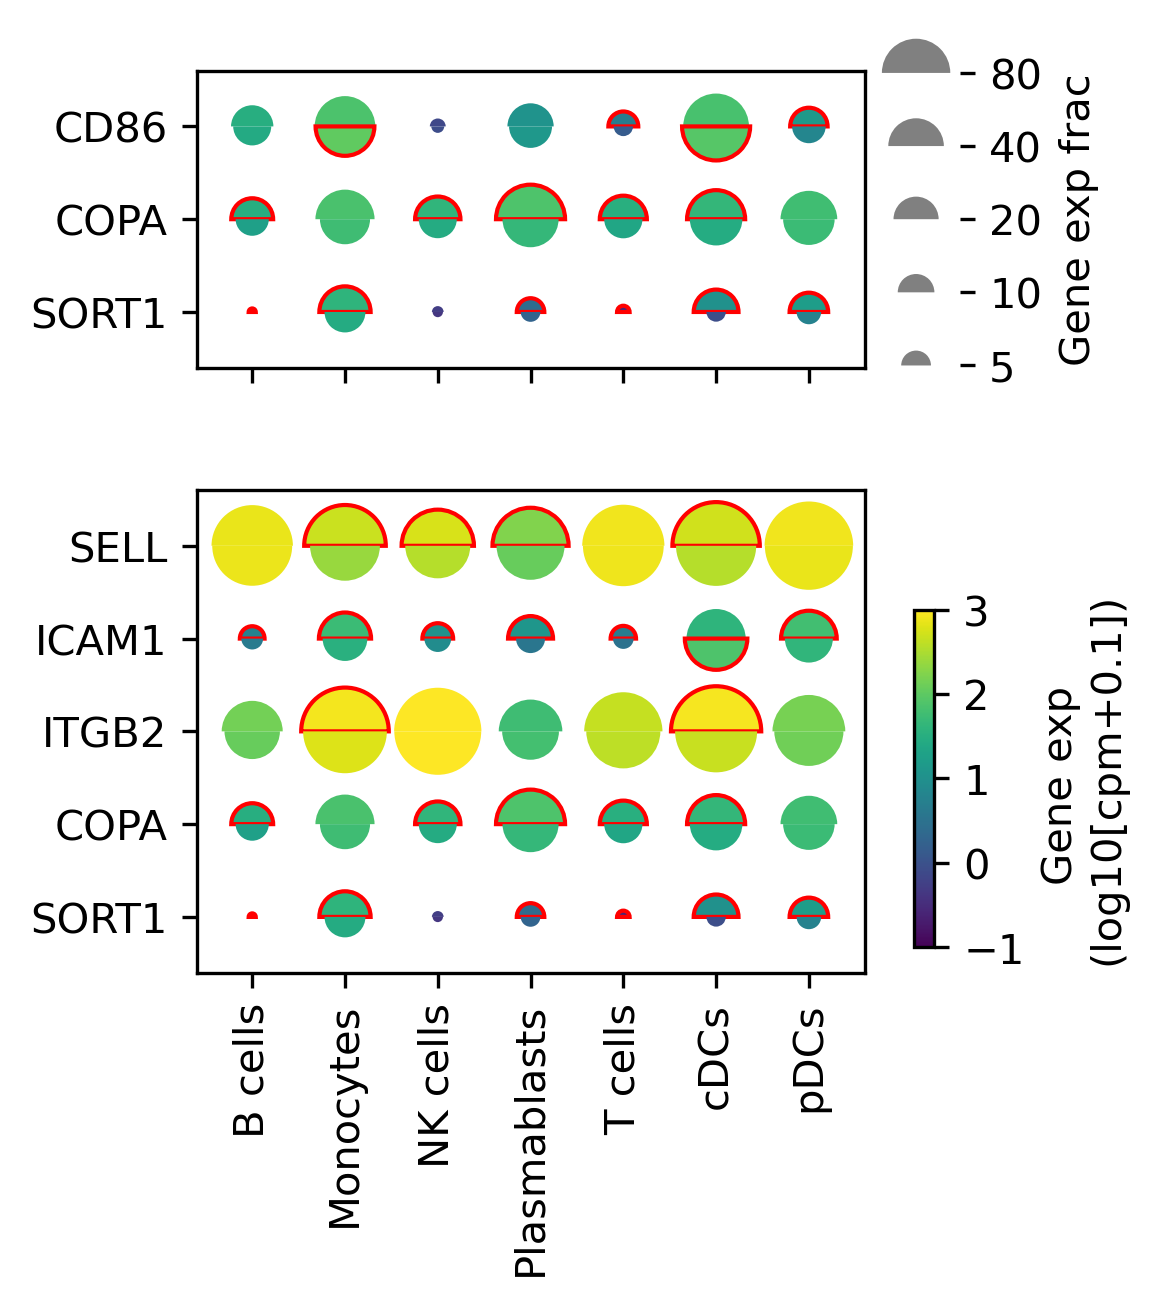

In [15]:
genes = [
    ['EBI3', '' ],
    ['SORT1', 'COPA', 'ITGB2', 'ICAM1', 'SELL'],
    
]
mushrooms(genes)

<ipython-input-5-a3647d529d7d>:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 990x1500 with 5 Axes>, 'ax': <AxesSubplot:>}

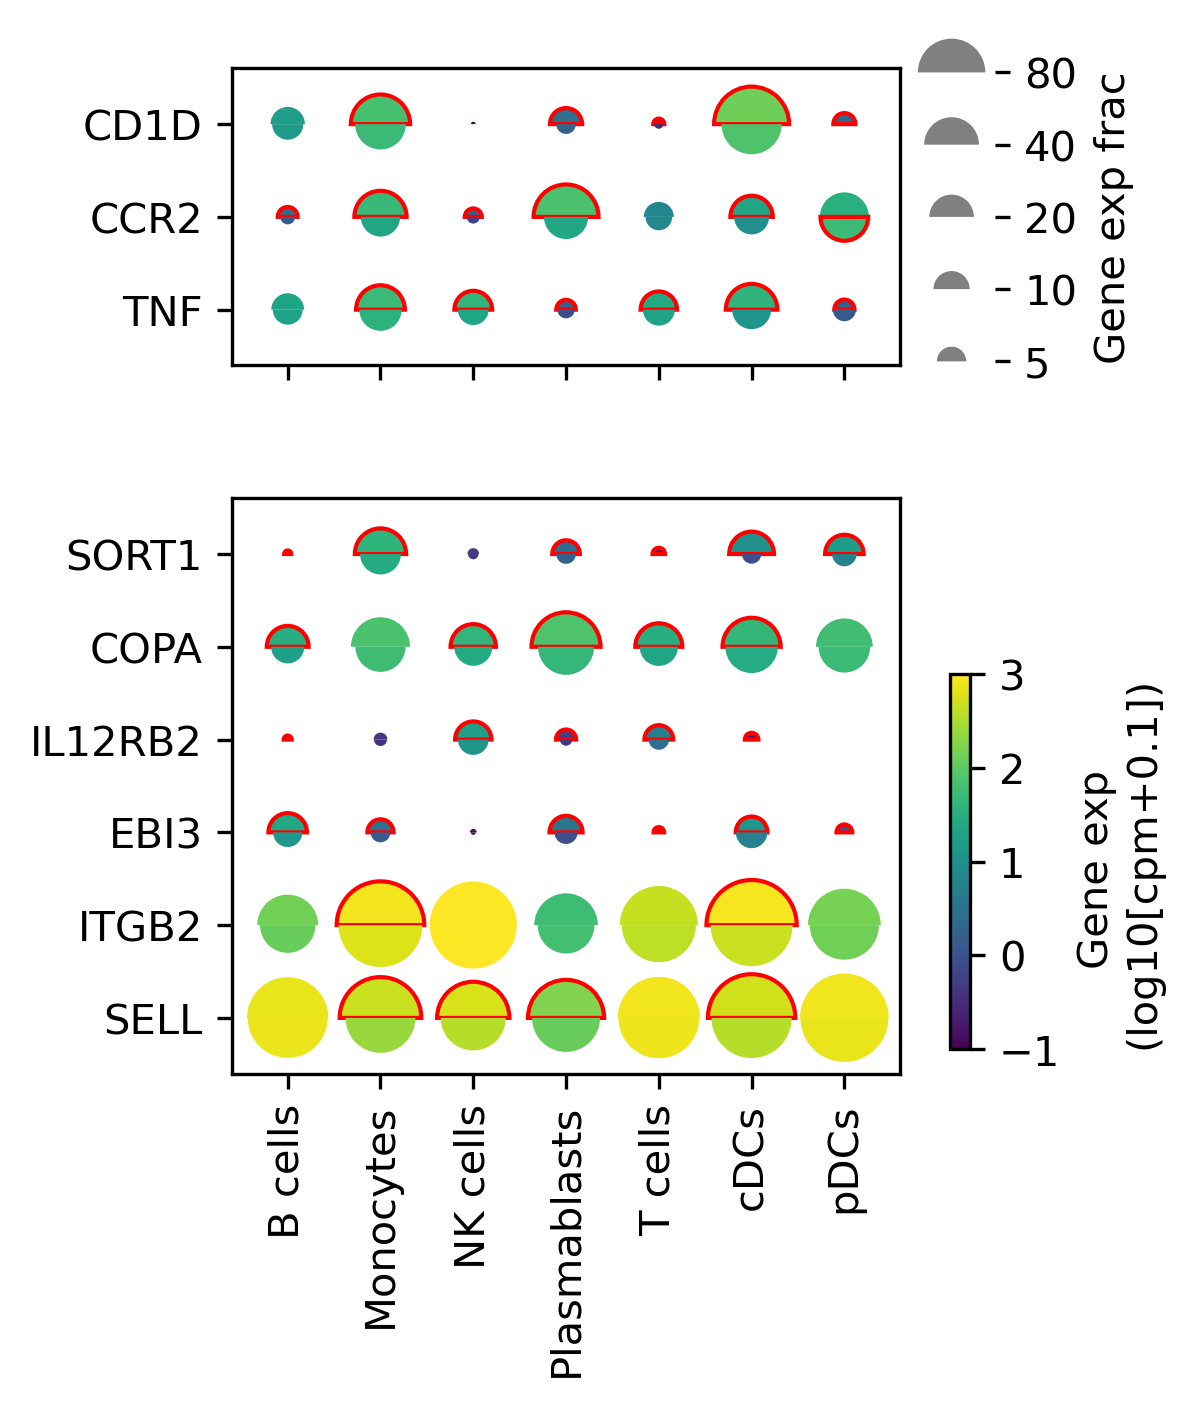

In [22]:
genes = [
    ['TNF', 'CCR2', 'CD1D'],
    ['SELL', 'ITGB2', 'EBI3', 'IL12RB2', 'COPA', 'SORT1'],
    
]
mushrooms(genes)